In [1]:
import pandas as pd
pd.options.display.max_colwidth = 1000

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\setia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\setia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\setia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\setia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv('cleaned_tweets.csv')
df.head()

,date,username,tweet
0,2022-02-13 00:38:03,mazzya6,i think it s two fold although i m sure there are far righters in the mix contrast two similar countries five minutes apart with completely different covid mandates and others are protesting against federal mandates and want mandates governing travel to be dropped
1,2022-02-13 00:38:02,Leanne00888573,i m sick of hearing this a family member of mine suffered heart failure days after their booster but apparently it s just one of those things because people suffer from heart failure daily yet these same people don t apply that logic to covid face with rolling eyes is covid now the only death
2,2022-02-13 00:38:02,Georgie_D_101,also you can t determine unless you looked at each case whether yes in fact covid was the factor that meant they couldn t recover from the crash also the variations in car accidents too the level of seriousness of injury would be different in each car accident case
3,2022-02-13 00:38:02,originalscout11,denmark s doing it all wrong they re counting cases and deaths correctly denmark mm people on mm virus is almost gone in on learn to lie and covid disappears in no time
4,2022-02-13 00:38:02,leadershipindex,how covid has changed the way we work via


In [3]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [4]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [5]:
df['POS tagged'] = df['tweet'].apply(token_stop_pos)
df.head()

,date,username,tweet,POS tagged
0,2022-02-13 00:38:03,mazzya6,i think it s two fold although i m sure there are far righters in the mix contrast two similar countries five minutes apart with completely different covid mandates and others are protesting against federal mandates and want mandates governing travel to be dropped,"[(think, v), (two, None), (fold, a), (although, None), (sure, a), (far, r), (righters, n), (mix, n), (contrast, n), (two, None), (similar, a), (countries, n), (five, None), (minutes, n), (apart, r), (completely, r), (different, a), (covid, n), (mandates, n), (others, n), (protesting, v), (federal, a), (mandates, n), (want, v), (mandates, n), (governing, v), (travel, n), (dropped, v)]"
1,2022-02-13 00:38:02,Leanne00888573,i m sick of hearing this a family member of mine suffered heart failure days after their booster but apparently it s just one of those things because people suffer from heart failure daily yet these same people don t apply that logic to covid face with rolling eyes is covid now the only death,"[(sick, n), (hearing, v), (family, n), (member, n), (mine, n), (suffered, v), (heart, n), (failure, n), (days, n), (booster, n), (apparently, r), (one, None), (things, n), (people, n), (suffer, v), (heart, n), (failure, n), (daily, a), (yet, r), (people, n), (apply, n), (logic, v), (covid, v), (face, n), (rolling, a), (eyes, n), (covid, a), (death, n)]"
2,2022-02-13 00:38:02,Georgie_D_101,also you can t determine unless you looked at each case whether yes in fact covid was the factor that meant they couldn t recover from the crash also the variations in car accidents too the level of seriousness of injury would be different in each car accident case,"[(also, r), (determine, v), (unless, None), (looked, v), (case, n), (whether, None), (yes, n), (fact, n), (covid, n), (factor, n), (meant, v), (recover, n), (crash, n), (also, r), (variations, n), (car, n), (accidents, n), (level, n), (seriousness, n), (injury, n), (would, None), (different, a), (car, n), (accident, n), (case, n)]"
3,2022-02-13 00:38:02,originalscout11,denmark s doing it all wrong they re counting cases and deaths correctly denmark mm people on mm virus is almost gone in on learn to lie and covid disappears in no time,"[(denmark, n), (wrong, a), (counting, v), (cases, n), (deaths, n), (correctly, r), (denmark, v), (mm, a), (people, n), (mm, n), (virus, n), (almost, r), (gone, v), (learn, n), (lie, v), (covid, v), (disappears, n), (time, n)]"
4,2022-02-13 00:38:02,leadershipindex,how covid has changed the way we work via,"[(covid, n), (changed, v), (way, n), (work, v), (via, None)]"


In [6]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_r = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_r = lemma_r + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_r = lemma_r + " " + lemma
    return lemma_r

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,date,username,tweet,POS tagged,Lemma
0,2022-02-13 00:38:03,mazzya6,i think it s two fold although i m sure there are far righters in the mix contrast two similar countries five minutes apart with completely different covid mandates and others are protesting against federal mandates and want mandates governing travel to be dropped,"[(think, v), (two, None), (fold, a), (although, None), (sure, a), (far, r), (righters, n), (mix, n), (contrast, n), (two, None), (similar, a), (countries, n), (five, None), (minutes, n), (apart, r), (completely, r), (different, a), (covid, n), (mandates, n), (others, n), (protesting, v), (federal, a), (mandates, n), (want, v), (mandates, n), (governing, v), (travel, n), (dropped, v)]",think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop
1,2022-02-13 00:38:02,Leanne00888573,i m sick of hearing this a family member of mine suffered heart failure days after their booster but apparently it s just one of those things because people suffer from heart failure daily yet these same people don t apply that logic to covid face with rolling eyes is covid now the only death,"[(sick, n), (hearing, v), (family, n), (member, n), (mine, n), (suffered, v), (heart, n), (failure, n), (days, n), (booster, n), (apparently, r), (one, None), (things, n), (people, n), (suffer, v), (heart, n), (failure, n), (daily, a), (yet, r), (people, n), (apply, n), (logic, v), (covid, v), (face, n), (rolling, a), (eyes, n), (covid, a), (death, n)]",sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death
2,2022-02-13 00:38:02,Georgie_D_101,also you can t determine unless you looked at each case whether yes in fact covid was the factor that meant they couldn t recover from the crash also the variations in car accidents too the level of seriousness of injury would be different in each car accident case,"[(also, r), (determine, v), (unless, None), (looked, v), (case, n), (whether, None), (yes, n), (fact, n), (covid, n), (factor, n), (meant, v), (recover, n), (crash, n), (also, r), (variations, n), (car, n), (accidents, n), (level, n), (seriousness, n), (injury, n), (would, None), (different, a), (car, n), (accident, n), (case, n)]",also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case
3,2022-02-13 00:38:02,originalscout11,denmark s doing it all wrong they re counting cases and deaths correctly denmark mm people on mm virus is almost gone in on learn to lie and covid disappears in no time,"[(denmark, n), (wrong, a), (counting, v), (cases, n), (deaths, n), (correctly, r), (denmark, v), (mm, a), (people, n), (mm, n), (virus, n), (almost, r), (gone, v), (learn, n), (lie, v), (covid, v), (disappears, n), (time, n)]",denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time
4,2022-02-13 00:38:02,leadershipindex,how covid has changed the way we work via,"[(covid, n), (changed, v), (way, n), (work, v), (via, None)]",covid change way work via


In [7]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
final_data = pd.DataFrame(df[['date', 'username', 'Lemma']])
final_data.head()

,date,username,Lemma
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time
4,2022-02-13 00:38:02,leadershipindex,covid change way work via


In [9]:
final_data['Subjectivity'] = final_data['Lemma'].apply(getSubjectivity)
final_data['Polarity'] = final_data['Lemma'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,date,username,Lemma,Subjectivity,Polarity,TextBlob
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop,0.722222,0.150000,Positive
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death,0.361429,-0.259524,Negative
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case,0.643750,-0.156250,Negative
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time,0.900000,-0.500000,Negative
4,2022-02-13 00:38:02,leadershipindex,covid change way work via,0.000000,0.000000,Neutral


In [10]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Positive    80
Neutral     75
Negative    45
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x18f5b5a0b50>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Positive'),
  Text(-0.9379041592647686, -0.5747484563127141, 'Neutral'),
  Text(1.0265480699775846, -0.8767548460232749, 'Negative')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5115840868716919, -0.3134991579887531, '37.5%'),
  Text(0.6463450810969976, -0.5520308289776175, '22.5%')])

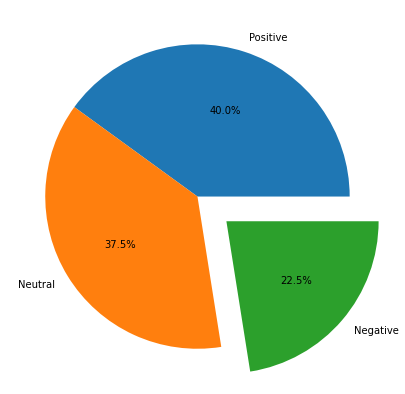

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vaderSentimentAnalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

final_data['Vader Sentiment'] = final_data['Lemma'].apply(vaderSentimentAnalysis)
final_data.head()

,date,username,Lemma,Subjectivity,Polarity,TextBlob,Vader Sentiment
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop,0.722222,0.150000,Positive,-0.1280
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death,0.361429,-0.259524,Negative,-0.9081
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case,0.643750,-0.156250,Negative,-0.8481
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time,0.900000,-0.500000,Negative,-0.8555
4,2022-02-13 00:38:02,leadershipindex,covid change way work via,0.000000,0.000000,Neutral,0.0000


In [18]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

final_data['vaderSentiment'] = final_data['Vader Sentiment'].apply(vader_analysis)
final_data.head()

,date,username,Lemma,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop,0.722222,0.150000,Positive,-0.1280,Neutral
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death,0.361429,-0.259524,Negative,-0.9081,Negative
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case,0.643750,-0.156250,Negative,-0.8481,Negative
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time,0.900000,-0.500000,Negative,-0.8555,Negative
4,2022-02-13 00:38:02,leadershipindex,covid change way work via,0.000000,0.000000,Neutral,0.0000,Neutral


In [20]:
vader_counts = final_data['vaderSentiment'].value_counts()
vader_counts

Neutral     129
Negative     43
Positive     28
Name: vaderSentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x18f5fe296d0>,
 [Text(-0.48393302764960144, 0.9878303623344902, 'Neutral'),
  Text(0.01727792958999895, -1.099864297606338, 'Negative'),
  Text(1.2215164659359323, -0.574802160266809, 'Positive')],
 [Text(-0.2639634696270553, 0.5388165612733582, '64.5%'),
  Text(0.009424325230908517, -0.5999259805125479, '21.5%'),
  Text(0.7691029600337351, -0.36191247127910187, '14.0%')])

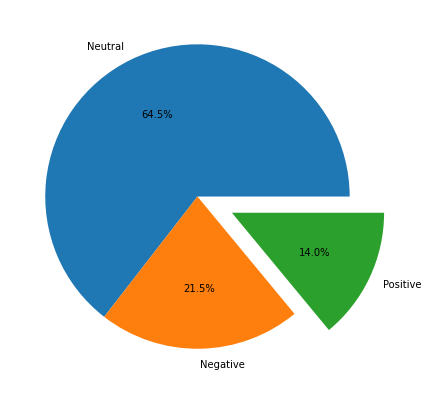

In [21]:
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [22]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\setia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


In [25]:
def sentiwordnetAnalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    
    if not tokens_count:
        return 0
    
    if sentiment > 0:
        return 'Positive'
    if sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'
    

In [26]:
final_data['SWN'] = df['POS tagged'].apply(sentiwordnetAnalysis)
final_data.head()

,date,username,Lemma,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment,SWN
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop,0.722222,0.150000,Positive,-0.1280,Neutral,Positive
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death,0.361429,-0.259524,Negative,-0.9081,Negative,Positive
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case,0.643750,-0.156250,Negative,-0.8481,Negative,Negative
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time,0.900000,-0.500000,Negative,-0.8555,Negative,Negative
4,2022-02-13 00:38:02,leadershipindex,covid change way work via,0.000000,0.000000,Neutral,0.0000,Neutral,Neutral


In [32]:
hasil = final_data[['date', 'username', 'Lemma', 'TextBlob', 'vaderSentiment', 'SWN']]
hasil

,date,username,Lemma,TextBlob,vaderSentiment,SWN
0,2022-02-13 00:38:03,mazzya6,think two fold although sure far righters mix contrast two similar country five minute apart completely different covid mandate others protest federal mandate want mandate govern travel drop,Positive,Neutral,Positive
1,2022-02-13 00:38:02,Leanne00888573,sick hear family member mine suffer heart failure day booster apparently one thing people suffer heart failure daily yet people apply logic covid face rolling eye covid death,Negative,Negative,Positive
2,2022-02-13 00:38:02,Georgie_D_101,also determine unless look case whether yes fact covid factor mean recover crash also variation car accident level seriousness injury would different car accident case,Negative,Negative,Negative
3,2022-02-13 00:38:02,originalscout11,denmark wrong count case death correctly denmark mm people mm virus almost go learn lie covid disappears time,Negative,Negative,Negative
4,2022-02-13 00:38:02,leadershipindex,covid change way work via,Neutral,Neutral,Neutral
...,...,...,...,...,...,...
195,2022-02-13 00:37:07,means_over,anything healthcare system good fact people fat unhealthy diabetic even mask people think fat okay get pull hospital obesity bad thing covid,Positive,Neutral,Negative
196,2022-02-13 00:37:07,samanth77470710,covid january book angiogram,Neutral,Neutral,Positive
197,2022-02-13 00:37:06,vickersty,yes vitamin vitamin essential health controversial prevent covid per se enough bad also safe preventative health measure general everyone take consideration,Positive,Positive,Positive
198,2022-02-13 00:37:06,Libero_official,bollettino covid febbraio nuovi contagi e decessi sia ricoveri ordinari che quelli terapia intensiva sono calo per il quinto giorno consecutivo,Neutral,Neutral,Positive


In [33]:
hasil.to_csv('hasil_sentiment.csv', index=False)